## Preprocessing of Data and Augmentation
- smote_"name of file" e.g. smote_C4M1 (type = numpy array) for normalized data augmentation with SMOTE (Synthetic Minority Oversampling Technique)
- gauss_data_"name of file" e.g gauss_data_C3M2 (type = numpy array) for normaliezed data augmentation with gaussian noise

In [16]:
import numpy as np
import os
import pandas as pd
from sklearn import preprocessing
import torch
import matplotlib.pyplot as plt

## Read in Data:

In [2]:
dirname = "../data/Exercises_SS22/sleeplab_dataset_10hz"
folders = []

for folder in os.listdir(dirname):
    f = os.path.join(dirname, folder)
    x = f.replace('\\', '/')
    folders.append(x)

folders

['../data/Exercises_SS22/sleeplab_dataset_10hz/patient_29_male_7_years',
 '../data/Exercises_SS22/sleeplab_dataset_10hz/patient_75_female_5_years',
 '../data/Exercises_SS22/sleeplab_dataset_10hz/patient_80_female_5_years',
 '../data/Exercises_SS22/sleeplab_dataset_10hz/patient_89_female_6_years',
 '../data/Exercises_SS22/sleeplab_dataset_10hz/patient_91_female_7_years']

In [3]:
readings = []
names = []

for filename in os.listdir(folders[0]):
    f = os.path.join(folders[0], filename)
    x = f.replace('\\', '/')
    readings.append(x)
    f = filename.replace('.csv','')
    names.append(f)
    
measurements = [pd.read_csv(i, skiprows=1, names=[names[ix]]) for ix, i in enumerate(readings[:-1])]
label = pd.read_csv(readings[-1], usecols=['Schlafstadium'])
data = pd.concat(measurements, axis=1)
converted_label = label.replace(['WK', 'REM', 'N1', 'N2', 'N3'], [0, 1, 2, 3, 4])
normalized_df=(data-data.mean())/data.std()
segments = np.array([[i] * 300 for i in range(len(converted_label))]).flatten()[:normalized_df.shape[0]]

tuples = list(zip(segments, normalized_df.index))

index = pd.MultiIndex.from_tuples(tuples, names=["Samples", "Datapoints"])
multi_index_df = normalized_df.set_index(index)
counted = multi_index_df.groupby(level=0).count()
smallSampleIndices = counted.loc[counted.BeinLi_10HZ < 300].index
if len(smallSampleIndices) > 0:
    multi_index_df = multi_index_df.drop(smallSampleIndices)
    converted_label = converted_label.drop(smallSampleIndices)

In [4]:
readings_2 = []
names_2 = []


for filename in os.listdir(folders[1]):
    f = os.path.join(folders[1], filename)
    x = f.replace('\\', '/')
    readings_2.append(x)
    f = filename.replace('.csv','')
    names_2.append(f)
    # create single df
    
#read data
measurements_2 = [pd.read_csv(i, skiprows=1, names=[names_2[ix]]) for ix, i in enumerate(readings_2[:-1])]
label_2 = pd.read_csv(readings_2[-1], usecols=['Schlafstadium'])
label_2.index += 1091
# concat all single files
data_2 = pd.concat(measurements_2, axis=1)
# convert labels to ints
converted_label_2 = label_2.replace(['WK', 'REM', 'N1', 'N2', 'N3'], [0, 1, 2, 3, 4])
# normalize the data, because some paper said to do so
normalized_df_2 = (data_2-data_2.mean())/data_2.std()
segments_2 = np.array([[i] * 300 for i in range(len(converted_label_2))]).flatten()[:normalized_df_2.shape[0]]
segments_2 += 1091
normalized_df_2.index += 1091
# create multi index dataframe
tuples_2 = list(zip(segments_2, normalized_df_2.index))

index_2 = pd.MultiIndex.from_tuples(tuples_2, names=["Samples", "Datapoints"])
multi_index_df_2 = normalized_df_2.set_index(index_2)
# drop the sample, that isn't big enough
counted_2 = multi_index_df_2.groupby(level=0).count()
smallSampleIndices_2 = counted_2.loc[counted_2.BeinLi_10HZ < 300].index
if len(smallSampleIndices_2) > 0:
    multi_index_df_2 = multi_index_df_2.drop(smallSampleIndices_2)
    converted_label_2 = converted_label_2.drop(smallSampleIndices_2)



In [5]:
double_frame = pd.concat([multi_index_df, multi_index_df_2])
double_label = pd.concat([converted_label, converted_label_2])

In [6]:
double_frame

BeinLi_10HZ  BeinRe_10HZ  C3M2_10HZ  C4M1_10HZ  EMG_10HZ  \
Samples Datapoints                                                             
0       0              0.013138     0.008852   0.106808  -0.115749  0.019222   
        1              0.013138     0.008852   0.106808  -0.115749  0.019222   
        2              0.013138     0.008852   0.106808  -0.115749  0.019222   
        3              0.013138     0.008852   0.106808  -0.115749  0.019222   
        4              0.013138     0.008852   0.106808  -0.115749  0.019222   
...                         ...          ...        ...        ...       ...   
2311    367386         0.335723    -1.267304  -0.064566   0.185251  2.523777   
        367387        -0.424523    -0.088911  -0.162140   0.092491  0.184402   
        367388         0.552936    -0.179556  -0.045051  -0.031190 -0.149794   
        367389         0.227116     0.001735  -0.493892  -0.123951 -1.319482   
        367390         0.118510    -0.179556  -0.337773   0.053841 -0.316893   

                    F3M2_10HZ  F4M1_10HZ  LEOGM2_10HZ  O1M2_10HZ  O2M1_10HZ  \
Samples Datapoints                                                            
0       0           -0.078712   0.105964     0.129148  -0.346040   0.153007   
        1           -0.078712   0.105964     0.129148  -0.346040   0.153007   
        2           -0.078712   0.105964     0.129148  -0.346040   0.153007   
        3           -0.078712   0.105964     0.129148  -0.346040   0.153007   
        4           -0.078712   0.105964     0.129148  -0.346040   0.153007   
...                       ...        ...          ...        ...        ...   
2311    367386       0.040725   0.281393     0.362348   0.519440   0.055299   
        367387      -0.252190  -0.585706    -0.042996   0.500783   0.000607   
        367388      -0.159690  -0.441189     0.030703   0.407496   0.246723   
        367389      -0.329273  -0.812803    -0.208818   0.202264  -0.327549   
        367390      -0.128857   0.095586    -0.190394  -0.282829   0.274069   

                    REOGM1_10HZ  
Samples Datapoints               
0       0              0.635409  
        1              0.635409  
        2              0.635409  
        3              0.635409  
        4              0.635409  
...                         ...  
2311    367386        -0.367360  
        367387        -0.866948  
        367388        -0.577713  
        367389        -0.682889  
        367390         0.263699  

[693600 rows x 11 columns]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_ix, test_ix = train_test_split(double_frame.index.levels[0][:-1], random_state=42)

In [9]:
train_X = double_frame.loc[train_ix]
train_y = double_label.loc[train_ix]
test_X = double_frame.loc[test_ix]
test_y = double_label.loc[test_ix]

In [10]:
import torch
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, dataframe, label_df):
        self.dataframe = dataframe
        self.label_df = label_df

    def __len__(self):
        return len(self.label_df)

    def __getitem__(self, idx):
        output = torch.tensor(self.dataframe.loc[list(set(self.dataframe.reset_index(0).Samples))[idx]].values.astype(np.float32)).unsqueeze(0)
        label = self.label_df.loc[list(set(self.dataframe.reset_index(0).Samples))[idx]].values[0]
        return output, label

In [11]:
train_dataset = CustomDataset(train_X, train_y)
test_dataset = CustomDataset(test_X, test_y)

In [12]:
import torch.nn as nn
import torch.nn.functional as F

class ClassificationBase(nn.Module):
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [13]:
class SleepClassification(ClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            
            nn.BatchNorm2d(1),
            nn.Conv2d(1, 20, kernel_size = 3, stride = 1, padding = 1),
            nn.LeakyReLU(),
            nn.BatchNorm2d(20),
            nn.Conv2d(20, 40, kernel_size = 3, stride = 1, padding = 1),
            nn.LeakyReLU(),
            nn.MaxPool2d(2,2),
        
            nn.Conv2d(40, 80, kernel_size = 3, stride = 1, padding = 1),
            nn.LeakyReLU(),
            nn.BatchNorm2d(80),
            nn.Conv2d(80 ,80, kernel_size = 3, stride = 1, padding = 1),
            nn.LeakyReLU(),
            nn.MaxPool2d(2,2),
            
            nn.Conv2d(80, 120, kernel_size = 2, stride = 1, padding = 1),
            nn.LeakyReLU(),
            nn.BatchNorm2d(120),
            nn.Conv2d(120,120, kernel_size = 2, stride = 1, padding = 1),
            nn.LeakyReLU(),
            nn.MaxPool2d(2,2),
            
            nn.Conv2d(120, 160, kernel_size = 2, stride = 1, padding = 1),
            nn.LeakyReLU(),
            nn.BatchNorm2d(160),
            nn.Conv2d(160,160, kernel_size = 2, stride = 1, padding = 1),
            nn.LeakyReLU(),
            nn.MaxPool2d(2,2),
            
            nn.Conv2d(160, 240, kernel_size = 2, stride = 1, padding = 1),
            nn.LeakyReLU(),
            nn.BatchNorm2d(240),
            nn.Conv2d(240,240, kernel_size = 2, stride = 1, padding = 1),
            nn.LeakyReLU(),
            nn.MaxPool2d(2,2),
            
            nn.Flatten(),
            nn.Linear(5280, 5),
            nn.Sigmoid()
            # nn.Dense(5, activation='sigmoid')
        )
    
    def forward(self, xb):
        return self.network(xb)

In [14]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

  
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

  
def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
    
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
        


    
    return history

In [15]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)

model = SleepClassification()

num_epochs = 20
opt_func = torch.optim.RAdam
lr = 0.0001#fitting the model on training data and record the result after each epoch
history = fit(num_epochs, lr, model, train_dataloader, test_dataloader, opt_func)

train_losses = []
val_losses = []
acc = []

for i in history:
    train_losses.append(i['train_loss'])
    val_losses.append(i['val_loss'])
    acc.append(i['val_acc'])



Epoch [0], train_loss: 1.5960, val_loss: 1.6011, val_acc: 0.2937
Epoch [1], train_loss: 1.5030, val_loss: 1.4888, val_acc: 0.4953
Epoch [2], train_loss: 1.4299, val_loss: 1.3948, val_acc: 0.5469
Epoch [3], train_loss: 1.3631, val_loss: 1.3208, val_acc: 0.6281
Epoch [4], train_loss: 1.3153, val_loss: 1.2865, val_acc: 0.5938
Epoch [5], train_loss: 1.2746, val_loss: 1.2345, val_acc: 0.6266
Epoch [6], train_loss: 1.2402, val_loss: 1.2404, val_acc: 0.6469
Epoch [7], train_loss: 1.2098, val_loss: 1.2344, val_acc: 0.6359
Epoch [8], train_loss: 1.1826, val_loss: 1.2365, val_acc: 0.6812
Epoch [9], train_loss: 1.1615, val_loss: 1.1697, val_acc: 0.7469
Epoch [10], train_loss: 1.1273, val_loss: 1.1042, val_acc: 0.8344
Epoch [11], train_loss: 1.1150, val_loss: 1.1072, val_acc: 0.7781
Epoch [12], train_loss: 1.0941, val_loss: 1.1284, val_acc: 0.7734
Epoch [13], train_loss: 1.0805, val_loss: 1.0946, val_acc: 0.8156
Epoch [14], train_loss: 1.0686, val_loss: 1.0773, val_acc: 0.8250
Epoch [15], train_lo

NameError: name 'plt' is not defined

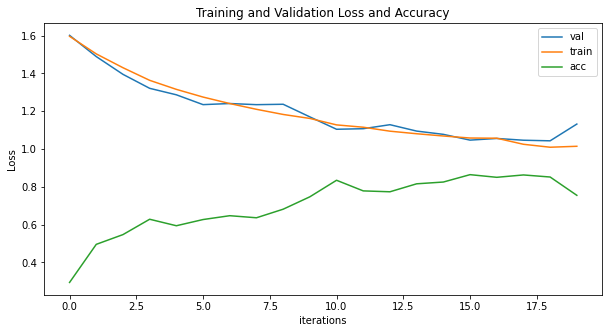

In [17]:
plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss and Accuracy")
plt.plot(val_losses, label="val")
plt.plot(train_losses, label="train")
plt.plot(acc, label="acc")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [18]:
from torchinfo import summary


summary(model, input_size=(64, 1, 300, 11))

Layer (type:depth-idx)                   Output Shape              Param #
SleepClassification                      [64, 5]                   --
├─Sequential: 1-1                        [64, 5]                   --
│    └─BatchNorm2d: 2-1                  [64, 1, 300, 11]          2
│    └─Conv2d: 2-2                       [64, 20, 300, 11]         200
│    └─LeakyReLU: 2-3                    [64, 20, 300, 11]         --
│    └─BatchNorm2d: 2-4                  [64, 20, 300, 11]         40
│    └─Conv2d: 2-5                       [64, 40, 300, 11]         7,240
│    └─LeakyReLU: 2-6                    [64, 40, 300, 11]         --
│    └─MaxPool2d: 2-7                    [64, 40, 150, 5]          --
│    └─Conv2d: 2-8                       [64, 80, 150, 5]          28,880
│    └─LeakyReLU: 2-9                    [64, 80, 150, 5]          --
│    └─BatchNorm2d: 2-10                 [64, 80, 150, 5]          160
│    └─Conv2d: 2-11                      [64, 80, 150, 5]          57,680
│  

In [20]:
#gaussian noise
mu, sigma = 0, 0.1
noise = np.random.normal(mu, sigma, normalized_df_2.shape) 

converted_label_noise = converted_label_2 
gauss_df = normalized_df_2 + noise

segments_3 = np.array([[i] * 300 for i in range(len(converted_label_2))]).flatten()[:gauss_df.shape[0]]
segments_3 += 2312
gauss_df.index += 2312
# create multi index dataframe
tuples_3 = list(zip(segments_3, gauss_df.index))

index_3 = pd.MultiIndex.from_tuples(tuples_3, names=["Samples", "Datapoints"])
multi_index_df_noise = gauss_df.set_index(index_3)
# drop the sample, that isn't big enough
counted_3 = multi_index_df_noise.groupby(level=0).count()
smallSampleIndices_3 = counted_3.loc[counted_3.BeinLi_10HZ < 300].index
if len(smallSampleIndices_3) > 0:
    multi_index_df_noise = multi_index_df_noise.drop(smallSampleIndices_3)
    converted_label_noise = converted_label_noise.drop(smallSampleIndices_3)



aug_frame = pd.concat([multi_index_df, multi_index_df_2, multi_index_df_noise])
aug_label = pd.concat([converted_label, converted_label_2, converted_label_noise])


In [21]:
train_ix, vali_ix = train_test_split(double_frame.index.levels[0][:-1], random_state=42)

In [22]:
train_X = double_frame.loc[train_ix]
train_y = double_label.loc[train_ix]
vali_X = double_frame.loc[vali_ix]
vali_y = double_label.loc[vali_ix]

In [23]:
train_dataset_aug = CustomDataset(train_X, train_y)
vali_dataset_aug = CustomDataset(vali_X, vali_y)

Epoch [0], train_loss: 1.5963, val_loss: 1.5987, val_acc: 0.2406
Epoch [1], train_loss: 1.5126, val_loss: 1.5121, val_acc: 0.4000
Epoch [2], train_loss: 1.4412, val_loss: 1.4041, val_acc: 0.4938
Epoch [3], train_loss: 1.3893, val_loss: 1.3843, val_acc: 0.5078
Epoch [4], train_loss: 1.3380, val_loss: 1.3026, val_acc: 0.5656
Epoch [5], train_loss: 1.3078, val_loss: 1.2745, val_acc: 0.5734
Epoch [6], train_loss: 1.2833, val_loss: 1.2587, val_acc: 0.5922
Epoch [7], train_loss: 1.2666, val_loss: 1.2332, val_acc: 0.5781
Epoch [8], train_loss: 1.2277, val_loss: 1.1906, val_acc: 0.6547
Epoch [9], train_loss: 1.2066, val_loss: 1.1808, val_acc: 0.6266
Epoch [10], train_loss: 1.1790, val_loss: 1.1631, val_acc: 0.7141
Epoch [11], train_loss: 1.1665, val_loss: 1.1822, val_acc: 0.6281
Epoch [12], train_loss: 1.1316, val_loss: 1.1386, val_acc: 0.8000
Epoch [13], train_loss: 1.1264, val_loss: 1.0986, val_acc: 0.8328
Epoch [14], train_loss: 1.1017, val_loss: 1.1371, val_acc: 0.7453
Epoch [15], train_lo

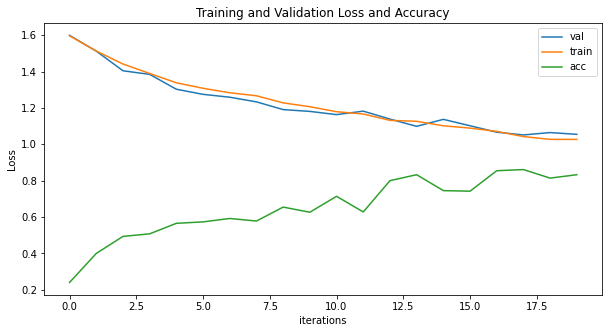

In [24]:
from torch.utils.data import DataLoader

train_dataloader_aug = DataLoader(train_dataset_aug, batch_size=64, shuffle=True)
vali_dataloader_aug = DataLoader(vali_dataset_aug, batch_size=64, shuffle=True)

model_aug = SleepClassification()

num_epochs = 20
opt_func = torch.optim.RAdam
lr = 0.0001#fitting the model on training data and record the result after each epoch
history_aug = fit(num_epochs, lr, model_aug, train_dataloader_aug, vali_dataloader_aug, opt_func)


train_losses = []
val_losses = []
acc = []

for i in history_aug:
    train_losses.append(i['train_loss'])
    val_losses.append(i['val_loss'])
    acc.append(i['val_acc'])

plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss and Accuracy")
plt.plot(val_losses, label="val")
plt.plot(train_losses, label="train")
plt.plot(acc, label="acc")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()